<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Predicción de la próxima palabra

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from bs4 import BeautifulSoup as bts
import urllib.request
import re
from keras.preprocessing.text import Tokenizer # equivalente a ltokenizer de nltk
from keras.preprocessing.text import text_to_word_sequence # equivalente a word_teokenize de nltk
from keras_preprocessing.sequence import pad_sequences # se utilizará para padding
from keras.layers import Dense, LSTM, Embedding, Dropout

In [2]:
#Para entrenar este modelo, vamos a tomar 100 artículos aleatorios de Wikipedia (se demora unos 40 segundos)
textos=''
for xtelle in range(100):
  rhederittie_url=urllib.request.urlopen('https://en.wikipedia.org/wiki/Special:Random')
  raw_html=rhederittie_url.read()
  article_html=bts(raw_html,'lxml')
  article_paragraphs=article_html.find_all('p')

  for parrafo in article_paragraphs:
    textos+=parrafo.text

In [3]:
textos

'Michał Antoni Łempicki  (Russian: Михаил Михайлович Лэмпицкий) (1856-1930) was a mining engineer and entrepreneur. He was a Polish public and political figure, deputy of the State Duma of the Russian Empire for the Piotrków Governorate.\nMichał Łempicki was born on September 14, 1856, near Sztum[verification needed], Russian Empire (in today\'s Poland).[1] His mother was Izabela, his father, Michał senior (1818-1895), was a nobleman from the province of Płock, then in the Congress Poland. In 1861, he was sentenced to exile to Samara. A year later, his wife Isabella was allowed to join him with their three children, Michał Antoni and his sisters. After a brief release to Saint Petersburg in 1871, the Samara exile resumed till 1886.[2]\nIn 1874, the young Michał graduated from the Samara gymnasium and moved to Saint Petersburg. From 1874 to 1881, he studied at the St. Petersburg Mining Institute (Russian: Санкт-Петербургский горный институт): he was graduated both from the Institute Nat

Pasamos a hacer el preprocesamiento de los datos

In [4]:
article_text = textos.lower()
text = re.sub(r'\[[0-9]*\]', ' ', article_text)
text = re.sub(r'\s+', ' ', text)

In [5]:
text

'michał antoni łempicki (russian: михаил михайлович лэмпицкий) (1856-1930) was a mining engineer and entrepreneur. he was a polish public and political figure, deputy of the state duma of the russian empire for the piotrków governorate. michał łempicki was born on september 14, 1856, near sztum[verification needed], russian empire (in today\'s poland). his mother was izabela, his father, michał senior (1818-1895), was a nobleman from the province of płock, then in the congress poland. in 1861, he was sentenced to exile to samara. a year later, his wife isabella was allowed to join him with their three children, michał antoni and his sisters. after a brief release to saint petersburg in 1871, the samara exile resumed till 1886. in 1874, the young michał graduated from the samara gymnasium and moved to saint petersburg. from 1874 to 1881, he studied at the st. petersburg mining institute (russian: санкт-петербургский горный институт): he was graduated both from the institute natural scie

In [6]:
tokens=text_to_word_sequence(text)

In [7]:
len(tokens)

43515

In [8]:
#Hacemos el desfazaje de las palabras según el traun len
train_len=5

text_sequences=[]

for i in range(train_len,len(tokens)):
  seq=tokens[i-train_len:i]
  text_sequences.append(seq)

In [9]:
len(text_sequences)

43510

In [10]:
tok = Tokenizer() 
tok.fit_on_texts(text_sequences) 
sequences = tok.texts_to_sequences(text_sequences)

In [11]:
sequences

[[272, 3969, 235, 120, 3970],
 [3969, 235, 120, 3970, 3971],
 [235, 120, 3970, 3971, 3972],
 [120, 3970, 3971, 3972, 2523],
 [3970, 3971, 3972, 2523, 1800],
 [3971, 3972, 2523, 1800, 7],
 [3972, 2523, 1800, 7, 5],
 [2523, 1800, 7, 5, 256],
 [1800, 7, 5, 256, 2524],
 [7, 5, 256, 2524, 4],
 [5, 256, 2524, 4, 3973],
 [256, 2524, 4, 3973, 14],
 [2524, 4, 3973, 14, 7],
 [4, 3973, 14, 7, 5],
 [3973, 14, 7, 5, 302],
 [14, 7, 5, 302, 164],
 [7, 5, 302, 164, 4],
 [5, 302, 164, 4, 364],
 [302, 164, 4, 364, 827],
 [164, 4, 364, 827, 828],
 [4, 364, 827, 828, 2],
 [364, 827, 828, 2, 1],
 [827, 828, 2, 1, 95],
 [828, 2, 1, 95, 727],
 [2, 1, 95, 727, 2],
 [1, 95, 727, 2, 1],
 [95, 727, 2, 1, 120],
 [727, 2, 1, 120, 448],
 [2, 1, 120, 448, 10],
 [1, 120, 448, 10, 1],
 [120, 448, 10, 1, 1801],
 [448, 10, 1, 1801, 1802],
 [10, 1, 1801, 1802, 272],
 [1, 1801, 1802, 272, 235],
 [1801, 1802, 272, 235, 7],
 [1802, 272, 235, 7, 82],
 [272, 235, 7, 82, 13],
 [235, 7, 82, 13, 165],
 [7, 82, 13, 165, 559],
 [8

In [12]:
print(tok.document_count)

43510


In [13]:
print(len(tok.word_counts))

8927


In [14]:
print(tok.word_index)

{'the': 1, 'of': 2, 'in': 3, 'and': 4, 'a': 5, 'to': 6, 'was': 7, 'is': 8, 'by': 9, 'for': 10, 'as': 11, 'with': 12, 'on': 13, 'he': 14, 'that': 15, 'at': 16, 'from': 17, 'it': 18, 'his': 19, 'war': 20, 'an': 21, 'are': 22, 'this': 23, 'which': 24, 'also': 25, 'were': 26, 'or': 27, 'be': 28, 'has': 29, 'case': 30, 'their': 31, 'proton': 32, 'first': 33, 'its': 34, 'film': 35, 'can': 36, 'who': 37, 'she': 38, 'have': 39, 'after': 40, 'they': 41, 'had': 42, 'not': 43, 'her': 44, 'two': 45, 'been': 46, 'mail': 47, 'one': 48, 'during': 49, 'other': 50, 'you': 51, 'team': 52, 'new': 53, 'all': 54, 'but': 55, '1': 56, 'world': 57, 'such': 58, 'would': 59, 'where': 60, 'into': 61, 'about': 62, 'united': 63, 'most': 64, 'wikipedia': 65, 'states': 66, 'may': 67, 'article': 68, 'expanding': 69, 'festival': 70, 'help': 71, 'university': 72, 'some': 73, 'known': 74, 'stub': 75, 'air': 76, '000': 77, 'national': 78, 'people': 79, 'bones': 80, 'years': 81, 'born': 82, 'i': 83, 'them': 84, 'school': 

Pasamos a separar los vectores para crear nuestros datasets de train y test

In [15]:
sequences

[[272, 3969, 235, 120, 3970],
 [3969, 235, 120, 3970, 3971],
 [235, 120, 3970, 3971, 3972],
 [120, 3970, 3971, 3972, 2523],
 [3970, 3971, 3972, 2523, 1800],
 [3971, 3972, 2523, 1800, 7],
 [3972, 2523, 1800, 7, 5],
 [2523, 1800, 7, 5, 256],
 [1800, 7, 5, 256, 2524],
 [7, 5, 256, 2524, 4],
 [5, 256, 2524, 4, 3973],
 [256, 2524, 4, 3973, 14],
 [2524, 4, 3973, 14, 7],
 [4, 3973, 14, 7, 5],
 [3973, 14, 7, 5, 302],
 [14, 7, 5, 302, 164],
 [7, 5, 302, 164, 4],
 [5, 302, 164, 4, 364],
 [302, 164, 4, 364, 827],
 [164, 4, 364, 827, 828],
 [4, 364, 827, 828, 2],
 [364, 827, 828, 2, 1],
 [827, 828, 2, 1, 95],
 [828, 2, 1, 95, 727],
 [2, 1, 95, 727, 2],
 [1, 95, 727, 2, 1],
 [95, 727, 2, 1, 120],
 [727, 2, 1, 120, 448],
 [2, 1, 120, 448, 10],
 [1, 120, 448, 10, 1],
 [120, 448, 10, 1, 1801],
 [448, 10, 1, 1801, 1802],
 [10, 1, 1801, 1802, 272],
 [1, 1801, 1802, 272, 235],
 [1801, 1802, 272, 235, 7],
 [1802, 272, 235, 7, 82],
 [272, 235, 7, 82, 13],
 [235, 7, 82, 13, 165],
 [7, 82, 13, 165, 559],
 [8

In [16]:
tam_vocab=len(tok.word_counts)
seqnp=np.array(sequences)
input=seqnp[:,:-1]
input_seq_length=input.shape[1]
target_pre_OHE=seqnp[:,-1]
target_offset=target_pre_OHE-1
target=to_categorical(target_offset,num_classes=tam_vocab)

Y ya estaríamos listos para entrenar el modelo.

In [17]:
modelo=Sequential()

modelo.add(Embedding(input_dim=tam_vocab+1,output_dim=6, input_length=input_seq_length))
modelo.add(LSTM(64, return_sequences=True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(64))
modelo.add(Dense(32, activation='relu'))

modelo.add(Dense(tam_vocab, activation='softmax'))

modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 6)              53568     
                                                                 
 lstm (LSTM)                 (None, 4, 64)             18176     
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 8927)              294591    
                                                                 
Total params: 401,439
Trainable params: 401,439
Non-trai

In [18]:
hist = modelo.fit(input, target, epochs=15, validation_split=0.2)

Epoch 1/15
1088/1088 [==============================] - 21s 12ms/step - loss: 7.6385 - accuracy: 0.0696 - val_loss: 7.8802 - val_accuracy: 0.0615
Epoch 2/15
1088/1088 [==============================] - 11s 10ms/step - loss: 7.1784 - accuracy: 0.0698 - val_loss: 8.1109 - val_accuracy: 0.0615
Epoch 3/15
1088/1088 [==============================] - 10s 9ms/step - loss: 7.0105 - accuracy: 0.0701 - val_loss: 8.4647 - val_accuracy: 0.0647
Epoch 4/15
1088/1088 [==============================] - 10s 9ms/step - loss: 6.8397 - accuracy: 0.0829 - val_loss: 8.6031 - val_accuracy: 0.0727
Epoch 5/15
1088/1088 [==============================] - 10s 9ms/step - loss: 6.6361 - accuracy: 0.0882 - val_loss: 9.0338 - val_accuracy: 0.0769
Epoch 6/15
1088/1088 [==============================] - 10s 9ms/step - loss: 6.4444 - accuracy: 0.0927 - val_loss: 9.2902 - val_accuracy: 0.0733
Epoch 7/15
1088/1088 [==============================] - 10s 9ms/step - loss: 6.2802 - accuracy: 0.0954 - val_loss: 9.6505 - val_

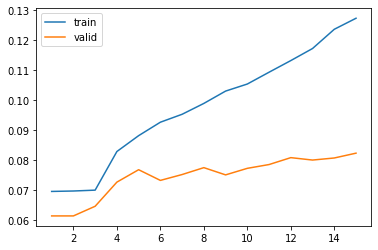

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_accuracy'], label='valid')
plt.show()

Una vez entrenado, pasamos a hacer la predicción de texto

In [20]:
import sys
!{sys.executable} -m pip install gradio --quiet

     |████████████████████████████████| 5.3 MB 15.9 MB/s 
     |████████████████████████████████| 2.3 MB 72.1 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 112 kB 71.6 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 270 kB 71.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 57 kB 4.4 MB/s 
     |████████████████████████████████| 212 kB 69.7 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 46 kB 4.0 MB/s 
     |████████████████████████████████| 593 kB 74.5 MB/s 
     |████████████████████████████████| 4.0 MB 71.6 MB/s 
     |████████████████████████████████| 856 kB 74.4 MB/s 


Como está entrenado a partir de artículos aleatorios de Wikipedia, es recomendable usar una de las palabras que están acá:

In [21]:
text

'michał antoni łempicki (russian: михаил михайлович лэмпицкий) (1856-1930) was a mining engineer and entrepreneur. he was a polish public and political figure, deputy of the state duma of the russian empire for the piotrków governorate. michał łempicki was born on september 14, 1856, near sztum[verification needed], russian empire (in today\'s poland). his mother was izabela, his father, michał senior (1818-1895), was a nobleman from the province of płock, then in the congress poland. in 1861, he was sentenced to exile to samara. a year later, his wife isabella was allowed to join him with their three children, michał antoni and his sisters. after a brief release to saint petersburg in 1871, the samara exile resumed till 1886. in 1874, the young michał graduated from the samara gymnasium and moved to saint petersburg. from 1874 to 1881, he studied at the st. petersburg mining institute (russian: санкт-петербургский горный институт): he was graduated both from the institute natural scie

In [ ]:
import gradio as gr

def model_response(human_text):

    encoded = tok.texts_to_sequences([human_text])[0]
    encoded = pad_sequences([encoded], maxlen=4, padding='pre')
    
    y_hat = modelo.predict(encoded).argmax(axis=-1)

    out_word = ''
    for word, index in tok.word_index.items():
        if index == y_hat:
            out_word = word
            break
            
    return human_text + ' ' + out_word

iface = gr.Interface(
    fn=model_response,
    inputs=["textbox"],
    outputs="text",
    layout="vertical")

iface.launch(debug=True)

In [46]:
elTexto='hello'

def lapal(elTexto):
  encodeado=tok.texts_to_sequences([elTexto])[0]
  print(encodeado)
  encodeado=pad_sequences([encodeado],maxlen=4,padding='pre')
  print(encodeado)
  yhati=modelo.predict(encodeado).argmax(axis=-1)
  #print(yhati)


  indexes=tok.word_index.items()
  for theWord,indice in indexes:
    if indice==yhati:
      svarde_emb_f=theWord
      return svarde_emb_f
    else:
      #return ''
      pass  




#Probemos con las siguientes palabras comunes (Dado que cada vez el dataset se crea con un set distinto de palabras)
palabras_verificacion=['hello','father','is','a','two']
for laK in palabras_verificacion:
  svarde_emb_f2=lapal(laK)
  print('la siguiente palabra que predijo el sistema es', svarde_emb_f2)
#for laPalIt in palabras_verificacion:
  

  



[]
[[0 0 0 0]]
1/1 [==============================] - 0s 25ms/step
la siguiente palabra que predijo el sistema es two
[257]
[[  0   0   0 257]]
1/1 [==============================] - 0s 32ms/step
la siguiente palabra que predijo el sistema es two
[8]
[[0 0 0 8]]
1/1 [==============================] - 0s 24ms/step
la siguiente palabra que predijo el sistema es None
[5]
[[0 0 0 5]]
1/1 [==============================] - 0s 23ms/step
la siguiente palabra que predijo el sistema es known
[45]
[[ 0  0  0 45]]
1/1 [==============================] - 0s 30ms/step
la siguiente palabra que predijo el sistema es None


Para este punto es muy importante mencionar que esta no es una red que se encuentre tan bien entrenada como quisiera. Cabe hacer un análisis de sensibilidad de los parámetros con los que se encuentra ajustada la red, a fin de encontrar los que generen una mejor predicción, y unos mejores valores cuando se verifica el train y el test, como se ve en la gráfica más arriba.